In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing

In [ ]:
# df = pd.read_csv("NSL_KDD_Train.csv")
train_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Train.csv'
test_url = 'https://raw.githubusercontent.com/merteroglu/NSL-KDD-Network-Instrusion-Detection/master/NSL_KDD_Test.csv'

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]


df_train = pd.read_csv(train_url,header=None, names = col_names)

df_test = pd.read_csv(test_url, header=None, names = col_names)

print('Dimensions of the Training set:',df_train.shape)
print('Dimensions of the Test set:',df_test.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


### Combine the train and test dataset

In [ ]:
df = pd.concat([df_train,df_test])

In [ ]:
print(f"Dimentions of complete dataframe : {df.shape}")

Dimentions of complete dataframe : (148517, 42)


In [ ]:
pd.options.display.max_rows = 999999
pd.options.display.max_columns = 500
pd.options.display.max_colwidth=1000

In [ ]:
df.head(10)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0         0           tcp    ftp_data   SF        491          0     0   
1         0           udp       other   SF        146          0     0   
2         0           tcp     private   S0          0          0     0   
3         0           tcp        http   SF        232       8153     0   
4         0           tcp        http   SF        199        420     0   
5         0           tcp     private  REJ          0          0     0   
6         0           tcp     private   S0          0          0     0   
7         0           tcp     private   S0          0          0     0   
8         0           tcp  remote_job   S0          0          0     0   
9         0           tcp     private   S0          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7  

In [ ]:
# df.to_csv("NSL_KDD.csv")

### List of distinct labels


In [ ]:
label_unique = df["label"].unique()
protocol_type_unique = df["protocol_type"].unique()
service_unique = df["service"].unique()
flag_unique = df["flag"].unique()

In [ ]:
label_unique

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

### Network Traffic Attack Types in NSL KDD Dataset:

**Probes:**

* **neptune, ipsweep, portsweep, nmap, satan:** These attacks aim to gather information about a network and its vulnerabilities. They scan for active hosts, open ports, and running services.
* **teardrop, smurf, pod:** These are more complex probes that exploit specific network protocol vulnerabilities to crash or overwhelm devices.

**Denial-of-Service (DoS):**

* **warezclient, warezmaster, phf, land, loadmodule:** These attacks aim to disrupt services by flooding the target with excessive traffic, consuming resources, and rendering it unavailable.

**User to Root (U2R):**

* **guess_passwd, ftp_write, multihop, rootkit:** These attacks exploit vulnerabilities in applications or protocols to gain unauthorized access and escalate privileges to root (super user) level.

**Remote to Local (R2L):**

* **back, imap, buffer_overflow, perl:** These attacks target specific user accounts or services to gain unauthorized access from a remote location.




In [ ]:
protocol_type_unique

array(['tcp', 'udp', 'icmp'], dtype=object)

In [ ]:
service_unique

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [ ]:
flag_unique

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

### Instead of one hot encoding we will try label encoding to convert the categorical values to numerical ones.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['protocol_type', 'service', 'flag']

label_encoder = LabelEncoder()

for i in categorical_columns:
  df[i]= label_encoder.fit_transform(df[i])


In [ ]:
df.head(10)

duration  protocol_type  service  flag  src_bytes  dst_bytes  land  \
0         0              1       20     9        491          0     0   
1         0              2       44     9        146          0     0   
2         0              1       49     5          0          0     0   
3         0              1       24     9        232       8153     0   
4         0              1       24     9        199        420     0   
5         0              1       49     1          0          0     0   
6         0              1       49     5          0          0     0   
7         0              1       49     5          0          0     0   
8         0              1       51     5          0          0     0   
9         0              1       49     5          0          0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          0                0   
1               0       0    0                  0          0                0   
2               0       0    0                  0          0                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          0                0   
6               0       0    0                  0          0                0   
7               0       0    0                  0          0                0   
8               0       0    0                  0          0                0   
9               0       0    0                  0          0                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      2   
1                 0                  0              0               0     13   
2                 0                  0              0               0    123   
3                 0                  0              0               0      5   
4                 0                  0              0               0     30   
5                 0                  0              0               0    121   
6                 0                  0              0               0    166   
7                 0                  0              0               0    117   
8                 0                  0              0               0    270   
9                 0                  0              0               0    133   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          2          0.0              0.0          0.0              0.0   
1          1          0.0              0.0          0.0              0.0   
2          6          1.0              1.0          0.0              0.0   
3          5          0.2              0.2          0.0              0.0   
4         32          0.0              0.0          0.0              0.0   
5         19          0.0              0.0          1.0              1.0   
6          9          1.0              1.0          0.0              0.0   
7         16  

### Scaling numericals values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ["duration","src_bytes", "dst_bytes","protocol_type", "service", "flag", "urgent", "hot", "num_failed_logins","num_compromised","su_attempted", "num_root" ,"num_file_creations" ,"num_shells","num_access_files","count","srv_count","dst_host_count", "dst_host_srv_count"]

min_max_scaler = MinMaxScaler()
df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])

In [ ]:
df_preprocessed = df.copy()

In [ ]:
df_preprocessed.shape

(148517, 42)

In [ ]:
df_preprocessed.head(3)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
0       0.0            0.5  0.289855   0.9  3.558064e-07        0.0     0   
1       0.0            1.0  0.637681   0.9  1.057999e-07        0.0     0   
2       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0     0.0  0.0                0.0          0              0.0   
1               0     0.0  0.0                0.0          0              0.0   
2               0     0.0  0.0                0.0          0              0.0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0           0.0       0.0                 0.0         0.0   
1           0           0.0       0.0                 0.0         0.0   
2           0           0.0       0.0                 0.0         0.0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  \
0               0.0                  0              0               0   
1               0.0                  0              0               0   
2               0.0                  0              0               0   

      count  srv_count  serror_rate  srv_serror_rate  rerror_rate  \
0  0.003914   0.003914          0.0              0.0          0.0   
1  0.025440   0.001957          0.0              0.0          0.0   
2  0.240705   0.011742          1.0              1.0          0.0   

   srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0              0.0           1.00           0.00                 0.0   
1              0.0           0.08           0.15                 0.0   
2              0.0           0.05           0.07                 0.0   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0        0.588235            0.098039                    0.17   
1        1.000000            0.003922                    0.00   
2        1.000000            0.101961                    0.10   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   1.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  0.05                       0.0   
1                       0.0                  0.00                       0.0   
2                       1.0                  0.00                       0.0   

     label  
0   normal  
1   normal  
2  neptune

In [ ]:
df_preprocessed_corr = df_preprocessed.copy()

In [ ]:
target = []
for i in df_preprocessed_corr["label"]:
  if i == "normal":
    target += [1]
  else :
    target += [0]
df_preprocessed_corr["label"] = np.array(target)

In [ ]:
df_preprocessed_corr.head(20)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0        0.0            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1        0.0            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
2        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
3        0.0            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4        0.0            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00  0.000000e+00     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00  0.000000e+00     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00  0.000000e+00     0   
12       0.0            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07  0.000000e+00     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00  0.000000e+00     0   
15       0.0            0.5  0.550725   0.5  0.000000e+00  0.000000e+00     0   
16       0.0            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
17       0.0            0.0  0.202899   0.9  1.304382e-08  0.000000e+00     0   
18       0.0            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19       0.0            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
2                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
12               0     0.0  0.0                0.0          1   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   
15               0     0.0  0.0                0.0          0   
16               0     0.0  0.0                0.0          1   
17               0     0.0  0.0                0.0          0   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
2               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0            

### Finding importance of each feature

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_preprocessed_corr.corr()

plt.figure(figsize=(100, 100))

heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=10)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

plt.title("Correlation Matrix", fontsize=16)

plt.show()

In [ ]:
correlation_matrix = df_preprocessed_corr.corr()
correlation_matrix

label_correlations = correlation_matrix['label'].sort_values(ascending=False)

print(f"Correlation with label (target attribute)\n: {label_correlations}")


Correlation with label (target attribute)
: label                          1.000000
same_srv_rate                  0.708911
dst_host_srv_count             0.692577
dst_host_same_srv_rate         0.667624
logged_in                      0.664117
flag                           0.629556
protocol_type                  0.271630
srv_diff_host_rate             0.113183
num_access_files               0.035478
su_attempted                   0.021545
num_file_creations             0.017585
srv_count                      0.015006
root_shell                     0.013468
num_root                       0.011165
num_compromised                0.009900
hot                            0.009637
num_shells                     0.000259
dst_bytes                     -0.003583
is_guest_login                -0.003839
urgent                        -0.003862
src_bytes                     -0.005457
is_host_login                 -0.007835
land                          -0.008817
num_failed_logins             -0.042

### Attributes with high positive correlation with label
* same_srv_rate                  = 0.708911
* dst_host_srv_count             = 0.692577
* dst_host_same_srv_rate         = 0.667624
* logged_in                      = 0.664117
* flag                           = 0.629556


### Attributes with high negative correlation with label
* count                      =    -0.524108
* srv_serror_rate            =    -0.586636
* serror_rate                =    -0.588474
* dst_host_serror_rate       =    -0.589936
* dst_host_srv_serror_rate   =    -0.593690

#### num_outbound_cmds has a correlation value of NaN it may indicate the standard deviation is 0 ie the value remains constant for all data points. Hence its best to remove it from the dataframe

In [ ]:
df_preprocessed_corr['num_outbound_cmds'].unique()

array([0])

### Feature importance

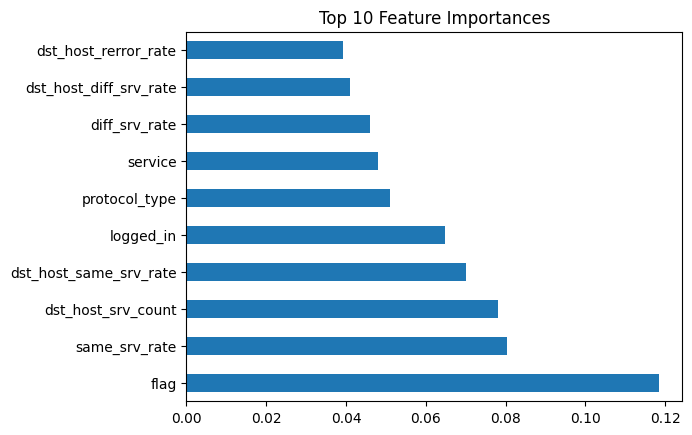

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_preprocessed_corr.drop('label', axis=1)
y = df_preprocessed_corr['label']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()

### Normal and Anomalous traffic data after preprocessing

In [ ]:
normal_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]=="normal"]
anomalous_traffic_preprocessed = df_preprocessed[df_preprocessed["label"]!="normal"]

In [ ]:
normal_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes     dst_bytes  land  \
0    0.00000            0.5  0.289855   0.9  3.558064e-07  0.000000e+00     0   
1    0.00000            1.0  0.637681   0.9  1.057999e-07  0.000000e+00     0   
3    0.00000            0.5  0.347826   0.9  1.681203e-07  6.223962e-06     0   
4    0.00000            0.5  0.347826   0.9  1.442067e-07  3.206260e-07     0   
12   0.00000            0.5  0.347826   0.9  2.079765e-07  1.718403e-06     0   
16   0.00000            0.5  0.347826   0.9  2.173970e-07  1.052569e-05     0   
18   0.00000            0.5  0.347826   0.9  1.688450e-07  4.702515e-07     0   
19   0.00000            0.5  0.347826   0.9  2.485572e-07  8.992796e-07     0   
22   0.00000            0.5  0.347826   0.9  1.833381e-07  9.088221e-06     0   
23   0.09715            1.0  0.637681   0.9  1.065245e-07  8.015650e-08     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
0                0     0.0  0.0                0.0          0   
1                0     0.0  0.0                0.0          0   
3                0     0.0  0.0                0.0          1   
4                0     0.0  0.0                0.0          1   
12               0     0.0  0.0                0.0          1   
16               0     0.0  0.0                0.0          1   
18               0     0.0  0.0                0.0          1   
19               0     0.0  0.0                0.0          1   
22               0     0.0  0.0                0.0          1   
23               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
0               0.0           0           0.0       0.0                 0.0   
1               0.0           0           0.0       0.0                 0.0   
3               0.0           0           0.0       0.0                 0.0   
4               0.0           0           0.0       0.0                 0.0   
12              0.0           0           0.0       0.0                 0.0   
16              0.0           0           0.0       0.0                 0.0   
18              0.0           0           0.0       0.0                 0.0   
19              0.0           0           0.0       0.0                 0.0   
22              0.0           0           0.0       0.0                 0.0   
23              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0          0.0               0.0                  0              0   
1          0.0               0.0                  0              0   
3          0.0               0.0                  0              0   
4          0.0               0.0                  0              0   
12         0.0               0.0                  0              0   
16         0.0               0.0                  0              0   
18         0.0               0.0                  0              0   
19         0.0               0.0                  0              0   
22         0.0               0.0                  0              0   
23         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
0                0  0.003914   0.003914          0.0             0.00   
1                0  0.025440   0.001957          0.0             0.00   
3                0  0.009785   0.009785          0.2             0.20   
4                0  0.058708   0.062622          0.0             0.00   
12               0  0.005871   0.013699          0.0             0.00   
16               0  0.015656   0.017613          0.0             0.11   
18               0  0.005871   0.005871          0.0             0.00   
19               0  0.017613   0.019569          0.0             0.00   
22               0  0.015656   0.019569          0.0             0.00   
23               0  0.001

In [ ]:
normal_traffic_preprocessed.shape

(77054, 42)

In [ ]:
preprocessed_columns = normal_traffic_preprocessed.columns

In [ ]:
anomalous_traffic_preprocessed.head(10)

duration  protocol_type   service  flag     src_bytes  dst_bytes  land  \
2        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
5        0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
6        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
7        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
8        0.0            0.5  0.739130   0.5  0.000000e+00        0.0     0   
9        0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
10       0.0            0.5  0.710145   0.1  0.000000e+00        0.0     0   
11       0.0            0.5  0.710145   0.5  0.000000e+00        0.0     0   
13       0.0            0.5  0.289855   0.9  2.420353e-07        0.0     0   
14       0.0            0.5  0.521739   0.5  0.000000e+00        0.0     0   

    wrong_fragment  urgent  hot  num_failed_logins  logged_in  \
2                0     0.0  0.0                0.0          0   
5                0     0.0  0.0                0.0          0   
6                0     0.0  0.0                0.0          0   
7                0     0.0  0.0                0.0          0   
8                0     0.0  0.0                0.0          0   
9                0     0.0  0.0                0.0          0   
10               0     0.0  0.0                0.0          0   
11               0     0.0  0.0                0.0          0   
13               0     0.0  0.0                0.0          1   
14               0     0.0  0.0                0.0          0   

    num_compromised  root_shell  su_attempted  num_root  num_file_creations  \
2               0.0           0           0.0       0.0                 0.0   
5               0.0           0           0.0       0.0                 0.0   
6               0.0           0           0.0       0.0                 0.0   
7               0.0           0           0.0       0.0                 0.0   
8               0.0           0           0.0       0.0                 0.0   
9               0.0           0           0.0       0.0                 0.0   
10              0.0           0           0.0       0.0                 0.0   
11              0.0           0           0.0       0.0                 0.0   
13              0.0           0           0.0       0.0                 0.0   
14              0.0           0           0.0       0.0                 0.0   

    num_shells  num_access_files  num_outbound_cmds  is_host_login  \
2          0.0               0.0                  0              0   
5          0.0               0.0                  0              0   
6          0.0               0.0                  0              0   
7          0.0               0.0                  0              0   
8          0.0               0.0                  0              0   
9          0.0               0.0                  0              0   
10         0.0               0.0                  0              0   
11         0.0               0.0                  0              0   
13         0.0               0.0                  0              0   
14         0.0               0.0                  0              0   

    is_guest_login     count  srv_count  serror_rate  srv_serror_rate  \
2                0  0.240705   0.011742          1.0              1.0   
5                0  0.236791   0.037182          0.0              0.0   
6                0  0.324853   0.017613          1.0              1.0   
7                0  0.228963   0.031311          1.0              1.0   
8                0  0.528376   0.045010          1.0              1.0   
9                0  0.260274   0.015656          1.0              1.0   
10               0  0.401174   0.023483          0.0              0.0   
11               0  0.389432   0.005871          1.0              1.0   
13               0  0.003914   0.003914          0.0              0.0   
14               0  0.455969   0.001957          1.0      

In [ ]:
anomalous_traffic_preprocessed.shape

(71463, 42)

# Basic AutoEncoder model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder(input_dim, encoding_dim):
  input_layer = Input(shape=(input_dim,))
  encoded = Dense(encoding_dim, activation="relu")(input_layer)
  decoded = Dense(input_dim, activation="sigmoid")(encoded)
  autoencoder = Model(inputs=input_layer,outputs=decoded)

  autoencoder.compile(optimizer="adam",loss="mean_squared_error")

  return autoencoder

In [ ]:
normal_traffic_arr = normal_traffic_preprocessed.to_numpy()
anomalous_traffic_arr = anomalous_traffic_preprocessed.to_numpy()

In [ ]:
train_arr = normal_traffic_arr[:-10000]
test_arr = np.concatenate((normal_traffic_arr[-10000:], anomalous_traffic_arr))

In [ ]:
train_df = pd.DataFrame(train_arr)
test_df = pd.DataFrame(test_arr)
train_df.columns = preprocessed_columns
test_df.columns = preprocessed_columns

In [ ]:
x_train = train_df.drop("label",axis=1)

In [ ]:
x_train.head(5).shape

(5, 41)

In [ ]:
x_train = np.array(x_train).astype("float32")

In [ ]:

input_dim = 41
encoding_dim = 16
autoencoder = create_autoencoder(input_dim, encoding_dim)
autoencoder.fit(x_train,x_train, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

ae_op = autoencoder.predict(x_train)
reconstruction_loss = autoencoder.evaluate(ae_op ,x_train)
print(reconstruction_loss)

Epoch 1/50
420/420 [==============================] - 2s 3ms/step - loss: 0.0567 - val_loss: 0.0159
Epoch 2/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0112 - val_loss: 0.0071
Epoch 3/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0054 - val_loss: 0.0044
Epoch 4/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0038 - val_loss: 0.0034
Epoch 5/50
420/420 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 6/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 8/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/50
420/420 [==============================] - 1s 3ms/step - loss: 0.0013 - val_loss: 0.0013

In [ ]:
# from keras.models import save_model

# autoencoder.save('autoencoder_model_01.h5')

In [ ]:
from keras.models import load_model

# Load the model from the file
# autoencoder = load_model('/content/drive/MyDrive/Colab Notebooks/models/autoencoder_model_01.h5')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense (Dense)               (None, 16)                672       
                                                                 
 dense_1 (Dense)             (None, 41)                697       
                                                                 
Total params: 1369 (5.35 KB)
Trainable params: 1369 (5.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


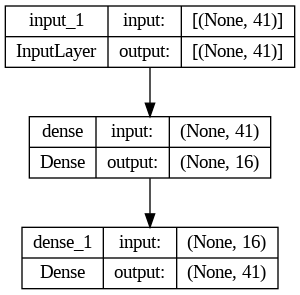

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
normal_train_output = autoencoder.predict(x_train)

2096/2096 [==============================] - 4s 2ms/step


In [ ]:
normal_train_output

array([[5.80997532e-03, 5.00575066e-01, 2.86093712e-01, ...,
        8.75231531e-03, 1.33125652e-02, 3.59566254e-03],
       [8.37564617e-02, 9.91978049e-01, 6.43494010e-01, ...,
        6.08712668e-04, 5.87518048e-03, 3.85060521e-05],
       [8.31374928e-05, 4.99688387e-01, 3.49495471e-01, ...,
        4.10498492e-03, 9.74132400e-03, 1.07260775e-02],
       ...,
       [2.30565842e-04, 5.02196908e-01, 3.52200776e-01, ...,
        3.48852132e-03, 9.57512390e-03, 9.72408149e-03],
       [2.64243828e-03, 4.95686263e-01, 3.48304302e-01, ...,
        8.45007319e-03, 9.78401124e-01, 9.33513105e-01],
       [3.64607782e-04, 9.92347717e-01, 1.78478613e-01, ...,
        5.71332872e-04, 1.67568948e-03, 3.11206910e-04]], dtype=float32)

### Calculating reconstruction loss of normal traffic data from train dataset

In [ ]:
mse_normal_train = np.mean(np.power(x_train - normal_train_output, 2), axis=1)
np.average(mse_normal_train)

0.00035663063

### Testing the model

In [ ]:
normal_test = test_df.loc[test_df["label"] == "normal"]
anomalous_test = test_df.loc[test_df["label"] != "normal"]

In [ ]:
normal_test.shape

(10000, 42)

In [ ]:
anomalous_test.shape

(71463, 42)

In [ ]:
normal_test = normal_test.drop("label",axis=1)
anomalous_test = anomalous_test.drop("label",axis=1)

In [ ]:
normal_test = np.array(normal_test).astype("float32")
anomalous_test = np.array(anomalous_test).astype("float32")

### Evaluating model on normal data from test dataset

In [ ]:
normal_test_op = autoencoder.predict(normal_test)

313/313 [==============================] - 0s 1ms/step


### Calculating reconstruction loss of normal traffic data from test dataset

In [ ]:
mse_normal_test = np.mean(np.power(normal_test - normal_test_op, 2), axis=1)
np.average(mse_normal_test)

0.0013014819

In [ ]:
mse_normal_test

array([0.00052945, 0.00080476, 0.00014535, ..., 0.00034629, 0.00025906,
       0.00033802], dtype=float32)

In [ ]:
threshold = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold)

Threshold:  0.0013514747


### Find how many normal traffic data from test dataset is classified as normal

In [ ]:
normal_count=0
non_normal_count=0
for i in mse_normal_test:
  if i < threshold:
    normal_count+=1
  else:
    non_normal_count+=1
print(f"normal count : {normal_count}")
print(f"non normal count : {non_normal_count}")

normal count : 9667
non normal count : 333


### Calculating reconstruction loss of anomalous traffic data from test dataset

In [ ]:
anomalous_test_op = autoencoder.predict(anomalous_test)

2234/2234 [==============================] - 3s 1ms/step


In [ ]:
mse_anomalous_test = np.mean(np.power(anomalous_test - anomalous_test_op, 2), axis=1)
np.average(mse_anomalous_test)

# loss1 = tf.keras.losses.mae(anomalous_test_op,np.array(anomalous_test).astype("float32"))
# np.max(loss1)

0.024504976

### Find how many anomalous traffic data from test dataset is classified as normal

In [ ]:
anomalous_count=0
non_anomalous_count=0
for i in mse_anomalous_test:
  if i > threshold:
    anomalous_count+=1
  else:
    non_anomalous_count+=1
print(f"anomalous count : {anomalous_count}")
print(f"non anomalous count : {non_anomalous_count}")

anomalous count : 60559
non anomalous count : 10904


### Find how many normal traffic data from train dataset is classified as normal

In [ ]:
normal_train_count=0
non_normal_train_count=0
for i in mse_normal_train:
  if i < threshold:
    normal_train_count+=1
  else:
    non_normal_train_count+=1
print(f"normal train count : {normal_train_count}")
print(f"non normal train count : {non_normal_train_count}")

normal train count : 65324
non normal train count : 1730



* TP = 64300
* FN = 7163
* TN = 9124
* FP = 876

### Verifying evalutation metrics using code

In [ ]:
target_test = []
for i in test_df["label"]:
  if i == "normal":
    target_test += [0]
  else:
    target_test += [1]

In [ ]:
x_test = test_df.drop("label",axis=1)

In [ ]:
x_test = np.array(x_test).astype("float32")

In [ ]:
x_test_output = autoencoder.predict(x_test)

2546/2546 [==============================] - 5s 2ms/step


In [ ]:
mse_test = np.mean(np.power(x_test - x_test_output, 2), axis=1)
np.average(mse_test)

0.021656629

In [ ]:
test_pred = []
for i in mse_test:
  if i > threshold:
    test_pred += [1]
  else:
    test_pred += [0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(target_test, test_pred)

print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(target_test, test_pred))

Confusion Matrix:
[[ 9667   333]
 [10904 60559]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.97      0.63     10000
           1       0.99      0.85      0.92     71463

    accuracy                           0.86     81463
   macro avg       0.73      0.91      0.77     81463
weighted avg       0.93      0.86      0.88     81463



In [ ]:
# fig, ax = plt.subplots(figsize=(4, 3))
# group_names = ["TN","FP","FN","TP"]
# group_counts = [f"{value:0.0f}" for value in cm.flatten()]
# # group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
# labels = [f"{v1}\n\n{v2}" for v1, v2 in zip(group_names,group_counts)]
# labels = np.asarray(labels).reshape(2,2)
# sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
len(x_train[0])

41

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

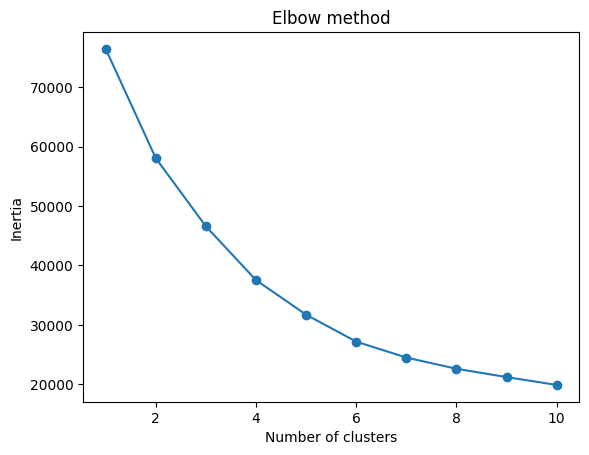

In [ ]:
from sklearn.cluster import KMeans
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# kmeans = KMeans(n_clusters=4)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_4'] = y

In [ ]:
# train_df["Cluster_4"].value_counts()

In [ ]:
# kmeans = KMeans(n_clusters=5)

# y = kmeans.fit_predict(x_train)

# train_df['Cluster_5'] = y

# # train_df.head(10)

In [ ]:
# train_df["Cluster_5"].value_counts()

In [ ]:
kmeans = KMeans(n_clusters=6)

y = kmeans.fit_predict(x_train)

train_df['Cluster_6'] = y

train_df.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


duration protocol_type   service flag src_bytes dst_bytes land  \
0      0.0           0.5  0.289855  0.9       0.0       0.0    0   
1      0.0           1.0  0.637681  0.9       0.0       0.0    0   
2      0.0           0.5  0.347826  0.9       0.0  0.000006    0   
3      0.0           0.5  0.347826  0.9       0.0       0.0    0   
4      0.0           0.5  0.347826  0.9       0.0  0.000002    0   
5      0.0           0.5  0.347826  0.9       0.0  0.000011    0   
6      0.0           0.5  0.347826  0.9       0.0       0.0    0   
7      0.0           0.5  0.347826  0.9       0.0  0.000001    0   
8      0.0           0.5  0.347826  0.9       0.0  0.000009    0   
9  0.09715           1.0  0.637681  0.9       0.0       0.0    0   

  wrong_fragment urgent  hot num_failed_logins logged_in num_compromised  \
0              0    0.0  0.0               0.0         0             0.0   
1              0    0.0  0.0               0.0         0             0.0   
2              0    0.0  0.0               0.0         1             0.0   
3              0    0.0  0.0               0.0         1             0.0   
4              0    0.0  0.0               0.0         1             0.0   
5              0    0.0  0.0               0.0         1             0.0   
6              0    0.0  0.0               0.0         1             0.0   
7              0    0.0  0.0               0.0         1             0.0   
8              0    0.0  0.0               0.0         1             0.0   
9              0    0.0  0.0               0.0         0             0.0   

  root_shell su_attempted num_root num_file_creations num_shells  \
0          0          0.0      0.0                0.0        0.0   
1          0          0.0      0.0                0.0        0.0   
2          0          0.0      0.0                0.0        0.0   
3          0          0.0      0.0                0.0        0.0   
4          0          0.0      0.0                0.0        0.0   
5          0          0.0      0.0                0.0        0.0   
6          0          0.0      0.0                0.0        0.0   
7          0          0.0      0.0                0.0        0.0   
8          0          0.0      0.0                0.0        0.0   
9          0          0.0      0.0                0.0        0.0   

  num_access_files num_outbound_cmds is_host_login is_guest_login     count  \
0              0.0                 0             0              0  0.003914   
1              0.0                 0             0              0   0.02544   
2              0.0                 0             0              0  0.009785   
3              0.0                 0             0              0  0.058708   
4              0.0                 0             0              0  0.005871   
5              0.0                 0             0              0  0.015656   
6              0.0                 0             0              0  0.005871   
7              0.0                 0             0              0  0.017613   
8              0.0                 0             0              0  0.015656   
9              0.0                 0             0              0  0.001957   

  srv_count serror_rate srv_serror_rate rerror_rate srv_rerror_rate  \
0  0.003914         0.0             0.0         0.0             0.0   
1  0.001957         0.0             0.0         0.0             0.0   
2  0.009785         0.2             0.2         0.0             0.0   
3  0.062622         0.0             0.0         0.0             0.0   
4  0.013699         0.0             0.0         0.0             0.0   
5  0.017613         0.0            0.11         0.0             0.0   
6  0.005871         0.0             0.0         0.0             0.0   
7  0.019569         0.0             0.0         0.0             0.0   
8  0.019569         0.0             0.0         0.0             0.0   
9  0.001957         0.0             0.0         0.0             0.0   

  same_srv_rate

In [ ]:
train_df["Cluster_6"].value_counts()

3    20014
2    16432
1    11312
0     9423
5     6976
4     2897
Name: Cluster_6, dtype: int64

In [ ]:
# len(anomalous_test)

In [ ]:
# # kmeans.predict()
# single_data = np.array(x_train[0]).reshape(1,-1)
# kmeans.predict(single_data)

In [ ]:
# count=[0]*6
# for i in range(len(anomalous_test)):
#   single_data_anomalous = np.array(anomalous_test[i]).reshape(1,-1)
#   cluster_assignment = kmeans.predict(single_data_anomalous)[0]
#   count[cluster_assignment]+=1
# for i in range(len(count)):
#   print(f"{i} = {count[i]}")


#### Silhouette score measures how similar an object is to its own cluster compared to other clusters.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(x_train)
    score = silhouette_score(x_train, labels)
    silhouette_scores.append(score)
print(silhouette_scores)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
np.average([0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152])








```
no of clusters = 2; Silhouette score = 0.3799493
no of clusters = 3; Silhouette score = 0.40116626
no of clusters = 4; Silhouette score = 0.40610144
no of clusters = 5; Silhouette score = 0.36659902
no of clusters = 6; Silhouette score = 0.4061593
no of clusters = 7; Silhouette score = 0.43478218
no of clusters = 8; Silhouette score = 0.445773
no of clusters = 9; Silhouette score = 0.45815152

average = 0.4123352525
Selected no. of clusters = 6
```




### Silhouette score
[0.3799493, 0.40116626, 0.40610144, 0.36659902, 0.4061593, 0.43478218, 0.445773, 0.45815152, 0.46496794, 0.46395656, 0.47388518] 2-12

In [ ]:
# from sklearn.metrics import davies_bouldin_score

# db_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = davies_bouldin_score(X, labels)
#     db_scores.append(score)
#     print(db_scores)

### Davies-Bouldin index - measures the compactness and separation of clusters
### Lower values are better
##### [0.733057668901962, 0.7555099168565746, 1.2446079968034003, 1.1909810912394254, 1.2417191950064965, 1.1911925326560844, 1.0515816505153819, 1.079250781871528, 1.0339256757596815]

In [ ]:
# from sklearn.metrics import calinski_harabasz_score

# ch_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k)
#     labels = kmeans.fit_predict(X)
#     score = calinski_harabasz_score(X, labels)
#     ch_scores.append(score)


In [ ]:
# print(ch_scores)

### Calinski-Harabasz index - ratio of between-cluster variance to within-cluster variance.
### higher the better
##### [96118.24635601316, 124488.2438637208, 113254.57836268976, 97770.26217660471, 91165.76209128421, 85167.607224014, 80653.49465380436, 77737.98473126955, 77096.54216044008]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


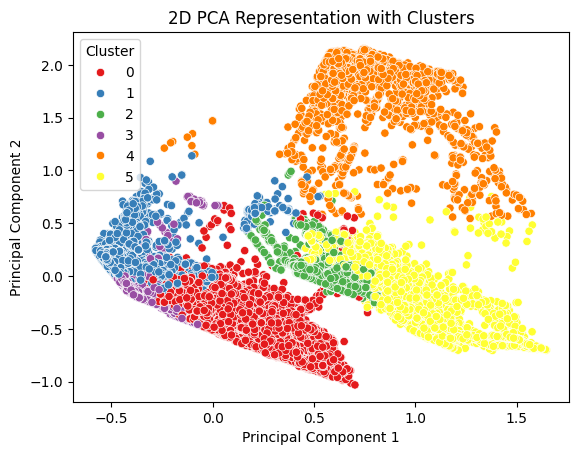

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_train)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

## PCA IMAGE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


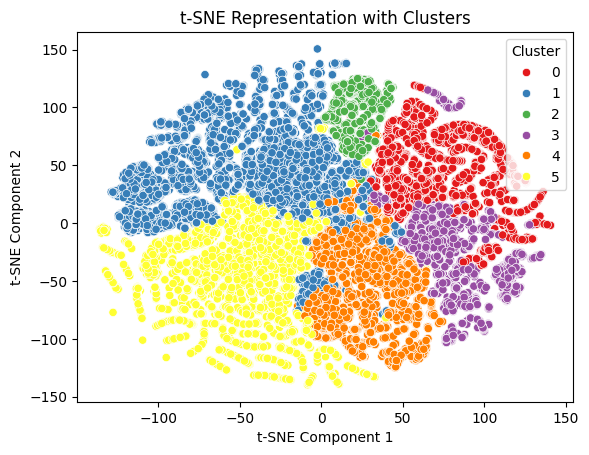

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_train)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_train)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


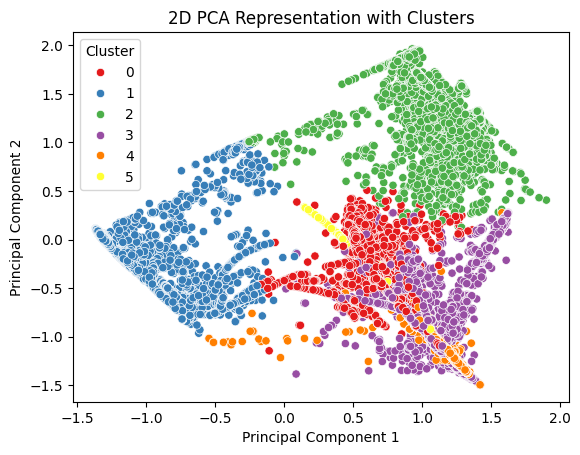

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_test)


# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(x_test)


# df_visualization = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('2D PCA Representation with Clusters')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


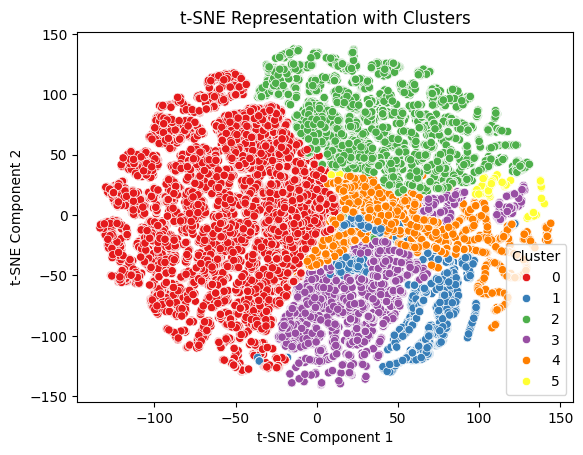

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans


# kmeans = KMeans(n_clusters=6)
# kmeans_labels = kmeans.fit_predict(x_test)


# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(x_test)


# import pandas as pd
# df_visualization = pd.DataFrame({'t-SNE 1': X_tsne[:, 0], 't-SNE 2': X_tsne[:, 1], 'Cluster': kmeans_labels})


# sns.scatterplot(x='t-SNE 1', y='t-SNE 2', hue='Cluster', data=df_visualization, palette='Set1')
# plt.title('t-SNE Representation with Clusters')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.show()

In [ ]:
# len(np.concatenate((anomalous_test[:2],normal_test[:2]),axis=1))


2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
X_normal = x_train
X_anomalous = anomalous_test
X = np.concatenate((X_normal, X_anomalous), axis=0)

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


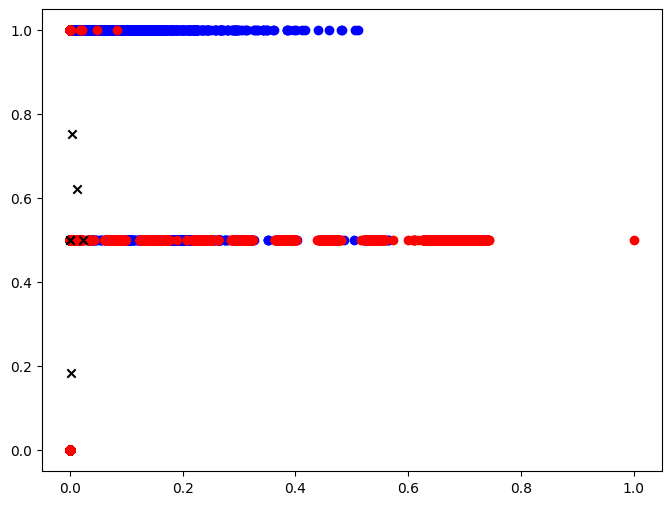

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='blue', label='Normal Points')
plt.scatter(X_anomalous[:, 0], X_anomalous[:, 1], c='red', label='Anomalous Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', label='Cluster Centers')

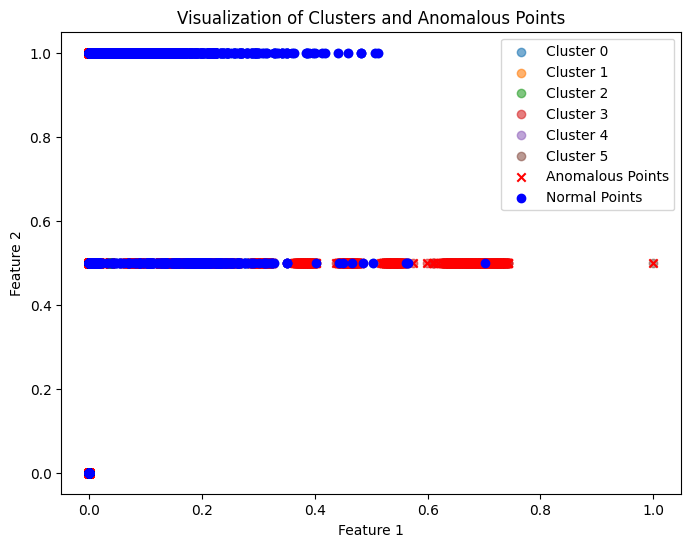

In [ ]:
plt.figure(figsize=(8, 6))

# Plot clustered data points
for i in range(6):
    plt.scatter(X[cluster_labels == i, 0], X[cluster_labels == i, 1], label=f'Cluster {i}', alpha=0.6)

# Mark anomalous points with X
plt.scatter(X_anomalous[:, 0], X_anomalous[:, 1], c='red', marker='x', label='Anomalous Points')

# Mark normal points with O
plt.scatter(X_normal[:, 0], X_normal[:, 1], c='blue', marker='o', label='Normal Points')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Clusters and Anomalous Points')
plt.legend()
plt.show()


## TSNE Image

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

# # Assuming x_train is your data
# agglomerative_model_single = AgglomerativeClustering(n_clusters=6, linkage='single')
# clusters_single = agglomerative_model_single.fit_predict(x_train)

# train_df['Cluster_Agglomerative_Single'] = clusters_single
# print(train_df['Cluster_Agglomerative_Single'].value_counts())


# # single link complete link hierarchical link average link

* 0    67047
* 1        3
* 3        1
* 5        1
* 4        1
* 2        1
Name: Cluster_Agglomerative_Single, dtype: int64

In [ ]:
# from sklearn.cluster import Birch

# birch_model = Birch(n_clusters=6)


# clusters = birch_model.fit_predict(x_train)

# train_df['Cluster_Birch'] = clusters

# print(train_df['Cluster_Birch'].value_counts())


* 0    46325
* 3    16036
* 1     3029
* 4      817
* 2      652
* 5      195
Name: Cluster_Birch, dtype: int64

In [ ]:
# from sklearn.cluster import DBSCAN

# dbscan_model = DBSCAN(eps=0.5, min_samples=10)


# clusters = dbscan_model.fit_predict(x_train)


# train_df['Cluster_DBSCAN'] = clusters

# print(train_df['Cluster_DBSCAN'].value_counts())


In [ ]:
# from sklearn.cluster import MeanShift

# meanshift_model = MeanShift()


# clusters = meanshift_model.fit_predict(x_train)


# train_df['Cluster_MeanShift'] = clusters


# print(train_df['Cluster_MeanShift'].value_counts())


In [ ]:
train_df.shape

In [ ]:
clustered_df = []
for i in range(6):
  clustered_df += [train_df[train_df["Cluster_6"] == i]]

In [ ]:
train_clustered_df = 6 * [0]
for i in range(len(clustered_df)):
  train_clustered_df[i] = clustered_df[i].drop(["Cluster_6","label"],axis=1)
train_clustered_df[0].head(10)

In [ ]:
train_clustered_df[5].shape

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

def create_autoencoder_v2(input_dim):
  input_layer = Input(shape=(input_dim,))
  encoded_1 = Dense(32, activation="relu")(input_layer)
  encoded_2 = Dense(16, activation="relu")(encoded_1)
  decoded_1 = Dense(32, activation="relu")(encoded_2)
  decoded_2 = Dense(input_dim, activation="sigmoid")(decoded_1)
  autoencoder = Model(inputs=input_layer,outputs=decoded_2)

  autoencoder.compile(optimizer="adam", loss=tf.keras.losses.MeanSquaredError)

  return autoencoder

In [ ]:
autoencoder_cluster_0 = create_autoencoder_v2(41)
autoencoder_cluster_1 = create_autoencoder_v2(41)
autoencoder_cluster_2 = create_autoencoder_v2(41)
autoencoder_cluster_3 = create_autoencoder_v2(41)
autoencoder_cluster_4 = create_autoencoder_v2(41)
autoencoder_cluster_5 = create_autoencoder_v2(41)

In [ ]:
from keras.callbacks import History

history_0 = History()
history_1 = History()
history_2 = History()
history_3 = History()
history_4 = History()
history_5 = History()

In [ ]:
from keras.utils import plot_model

plot_model(autoencoder_cluster_0, to_file='autoencoder_visualization.png', show_shapes=True, show_layer_names=True)

In [ ]:
autoencoder_cluster_0.metrics_names

## cluster 0 training

In [ ]:
training_array_0 = np.array(train_clustered_df[0]).astype("float32")


In [ ]:
training_array_0[0]

In [ ]:

autoencoder_cluster_0.fit(training_array_0,training_array_0, epochs=50, batch_size=128, shuffle=True, validation_split=0.2)

In [ ]:

ae_op_cluster_0 = autoencoder_cluster_0.predict(training_array_0)

In [ ]:
plt.plot(history_0.history['accuracy'], label='Training Accuracy')
plt.plot(history_0.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
mse_cluster_0_train = np.mean(np.power(training_array_0 - ae_op_cluster_0, 2), axis=1)
np.average(mse_cluster_0_train)

In [ ]:
threshold_0 = np.mean(mse_normal_train) + np.std(mse_normal_train)
print("Threshold: ", threshold_0)

## Cluster 1 training

In [ ]:
training_array_1 = np.array(train_clustered_df[1]).astype("float32")
autoencoder_cluster_1.fit(training_array_1,training_array_1, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[AccuracyCallback()])
ae_op_cluster_1 = autoencoder_cluster_1.predict(training_array_1)

In [ ]:
mse_cluster_1_train = np.mean(np.power(training_array_1 - ae_op_cluster_1, 2), axis=1)
np.average(mse_cluster_1_train)

In [ ]:
threshold_1 = np.mean(mse_cluster_1_train) + np.std(mse_cluster_1_train)
print("Threshold: ", threshold_1)

## cluster 2 training

In [ ]:
training_array_2 = np.array(train_clustered_df[2]).astype("float32")
autoencoder_cluster_2.fit(training_array_2,training_array_2, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[AccuracyCallback()])
ae_op_cluster_2 = autoencoder_cluster_2.predict(training_array_2)

In [ ]:
mse_cluster_2_train = np.mean(np.power(training_array_2 - ae_op_cluster_2, 2), axis=1)
np.average(mse_cluster_2_train)

In [ ]:
threshold_2 = np.mean(mse_cluster_2_train) + np.std(mse_cluster_2_train)
print("Threshold: ", threshold_2)

## cluster 3 training

In [ ]:
training_array_3 = np.array(train_clustered_df[3]).astype("float32")
autoencoder_cluster_3.fit(training_array_3,training_array_3, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[AccuracyCallback()])
ae_op_cluster_3 = autoencoder_cluster_3.predict(training_array_3)

In [ ]:
mse_cluster_3_train = np.mean(np.power(training_array_3 - ae_op_cluster_3, 2), axis=1)
np.average(mse_cluster_3_train)

In [ ]:
threshold_3 = np.mean(mse_cluster_3_train) + np.std(mse_cluster_3_train)
print("Threshold: ", threshold_3)

## cluster 4 training

In [ ]:
training_array_4 = np.array(train_clustered_df[4]).astype("float32")
autoencoder_cluster_4.fit(training_array_4,training_array_4, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[AccuracyCallback()])
ae_op_cluster_4 = autoencoder_cluster_4.predict(training_array_4)

In [ ]:
mse_cluster_4_train = np.mean(np.power(training_array_4 - ae_op_cluster_4, 2), axis=1)
np.average(mse_cluster_4_train)

In [ ]:
threshold_4 = np.mean(mse_cluster_4_train) + np.std(mse_cluster_4_train)
print("Threshold: ", threshold_4)

## cluster 5 training

In [ ]:
training_array_5 = np.array(train_clustered_df[5]).astype("float32")
autoencoder_cluster_5.fit(training_array_5,training_array_5, epochs=50, batch_size=128, shuffle=True, validation_split=0.2, callbacks=[AccuracyCallback()])
ae_op_cluster_5 = autoencoder_cluster_5.predict(training_array_5)

In [ ]:
mse_cluster_5_train = np.mean(np.power(training_array_5 - ae_op_cluster_5, 2), axis=1)
np.average(mse_cluster_5_train)

In [ ]:
threshold_5 = np.mean(mse_cluster_5_train) + np.std(mse_cluster_5_train)
print("Threshold: ", threshold_5)

In [ ]:
threshold_arr = [threshold_0,threshold_1,threshold_2,threshold_3,threshold_4,threshold_5]
autoencoder_arr = [autoencoder_cluster_0,autoencoder_cluster_1,autoencoder_cluster_2,autoencoder_cluster_3,autoencoder_cluster_4,autoencoder_cluster_5]

In [ ]:
def cluster_assignment(test_data):
  test_data_arr = np.array(test_data).reshape(1,-1)
  return kmeans.predict(test_data_arr)[0]

In [ ]:
def mse_loss(input_data, output_data):
    squared_diff = np.square(input_data - output_data)
    return np.mean(squared_diff)

In [ ]:
def cluster_autoencoder_pair(X):
  count_normal = 0
  count_anomalous = 0
  for i in range(len(X)):
    cluster_no = cluster_assignment(X[i])
    autoencoder_output = autoencoder_arr[cluster_no].predict(X[i].reshape(1,-1))
    loss = mse_loss(X[i], autoencoder_output)
    if( loss > threshold_arr[cluster_no]):
      count_anomalous += 1
    else:
      count_normal += 1
  return (count_anomalous,count_normal)

In [ ]:
# cluster_autoencoder_pair(x_train)

In [ ]:
# cluster_autoencoder_pair(normal_test)

In [ ]:
# cluster_autoencoder_pair(anomalous_test)